In [13]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import glob 
import random
import os
from utility_functions import plot_n_samples, remove_folder_contents, split_data_and_annotations

### Split the data into train, test and val for training YOLO

In [ ]:
image_folder = "../Data/original_data/images"
annotation_folder = "../Data/original_data/labels"
flag = False # Change the flag when runninng the first time.
if flag:
    split_data_and_annotations(image_folder, annotation_folder, 0.7, val_ratio=0.2, test_ratio=0.1)

In [11]:
# !pip install ultralytics

### Visualize the heads

14326


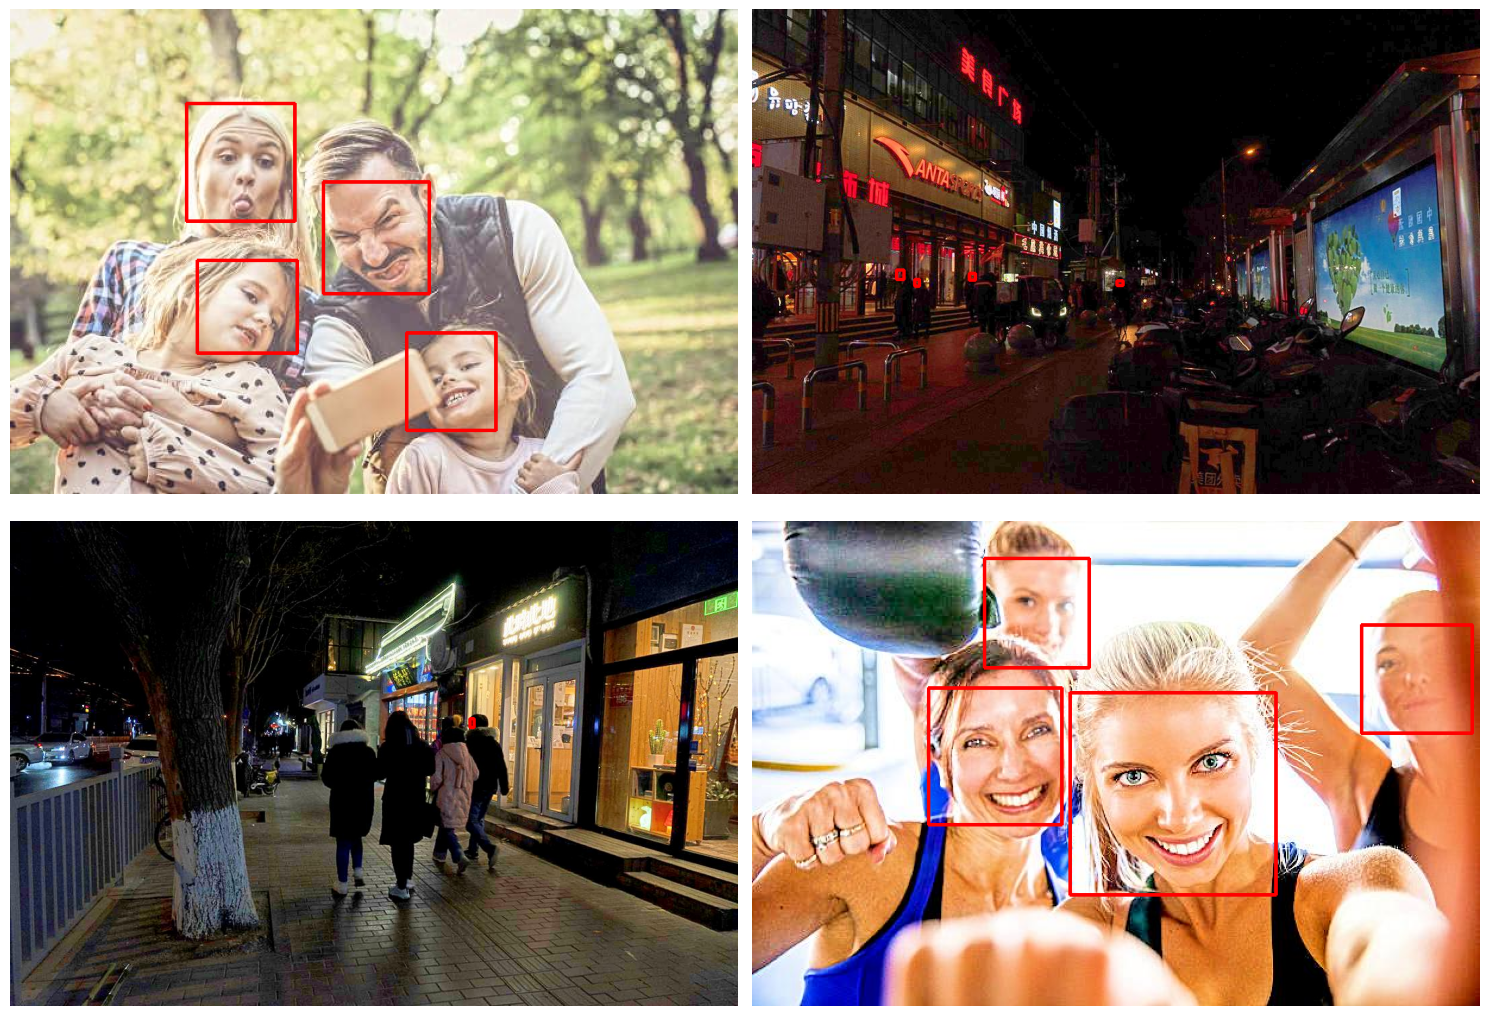

In [15]:
# Visualize a few training images.
plot_n_samples(
    image_paths='../data/images/train', 
    label_paths='../data/labels/train',
    num_samples=4
)

In [12]:
# yaml file for training yolo
%%writefile config.yaml
path: '../data'
train: 'images/train'
val: 'images/val'
test: 'images/test'

# class names
names: 
  0: 'head'

Overwriting config.yaml


In [14]:
# This is to delete the contents of the working directory.
if False:
    folder_path = '/kaggle/working'
    remove_folder_contents(folder_path)

In [ ]:
from ultralytics import YOLO
model = YOLO('yolov8s.yaml')
# Train the model
model.train(data = '/kaggle/input/yolods/YYOOLLOO/scripts/config.yaml', epochs = 50, task = 'detect', name = 'yolov8xv2', imgsz = 1280)

Ultralytics YOLOv8.1.37 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/input/yolods/YYOOLLOO/config.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8xv2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_

wandb: Currently logged in as: kiranmajji1622. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/yolods/YYOOLLOO/data/labels/train... 7163 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7163/7163 [00:12<00:00, 587.04it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/yolods/YYOOLLOO/data/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/yolods/YYOOLLOO/data/labels/val... 2046 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2046/2046 [00:03<00:00, 541.16it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/yolods/YYOOLLOO/data/labels is not writeable, cache not saved.
Plotting labels to runs/detect/yolov8xv2/labels.jpg... 


In [12]:
!yolo task=detect mode=val model=runs/detect/yolov8x/weights/best.pt name=yolov8s_eval data='/kaggle/input/yolods/YYOOLLOO/config.yaml'

Ultralytics YOLOv8.1.37 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/input/yolods/YYOOLLOO/data/labels/val... 2046 images, 0 ba
val: WARNING ⚠️ Cache directory /kaggle/input/yolods/YYOOLLOO/data/labels is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       2046      12382      0.865      0.619      0.711      0.333
Speed: 0.8ms preprocess, 25.3ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov8n_eval2
💡 Learn more at https://docs.ultralytics.com/modes/val


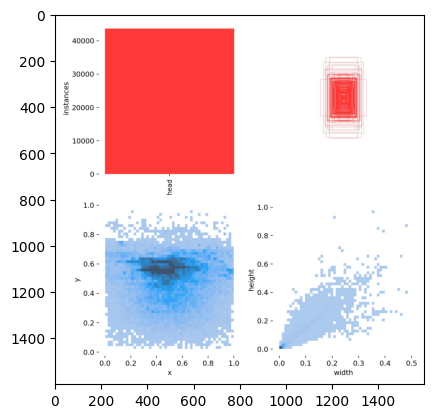

In [90]:
# Visualize results
path = '/kaggle/working/runs/detect/yolov8x/labels.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [18]:
# Run the model on the test data and save the data, the result images contain the bounding boxes.
!yolo task=detect \
mode=predict \
model=runs/detect/yolov8x/weights/best.pt \
source=/kaggle/input/yolodstest/test_bright \
imgsz=1280 \
name=yolov8s_test_results \
hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.299999999999999' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.1.37 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/3963 /kaggle/input/yolodstest/test_bright/10.jpg: 864x1280 1 head, 79.5ms
image 2/3963 /kaggle/input/yolodstest/test_bright/10005.jpg: 864x1280 3 heads, 35.3ms
image 3/3963 /kaggle/input/yolodstest/test_bright/10006.jpg: 864x1280 3 heads, 35.3ms
image 4/3963 /kaggle/input/yolodstest/test_bright/10009.jpg: 864x1280 3 heads, 35.3ms
image 5/3963 /kaggle/input/yolodstest/test_bright/10011.jpg: 864x1280 3 heads, 33.7ms
image 6/3963 /kaggle/input/yolodstest/test_bright/10014.jpg: 864x1280 3 heads, 31.5ms
image 7/3963 /kaggle/input/yolodstest/test_bright/10016.jpg: 864x1280 3 heads, 31.5ms
image 8/3963 /kaggle/input/yolodstest/test_bright/10019.jpg: 864x1280 4 heads, 31.5ms
image 9/


image 1/1 /kaggle/input/yolodstest/test_bright/16.jpg: 864x1280 5 heads, 36.0ms
Speed: 10.6ms preprocess, 36.0ms inference, 1.5ms postprocess per image at shape (1, 3, 864, 1280)
5


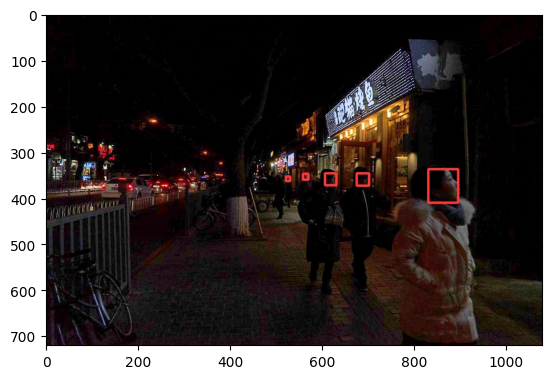

In [95]:
img = cv2.imread('/kaggle/working/runs/detect/yolov8s_test_results/16.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Run inference on an image
model = YOLO('runs/detect/yolov8x/weights/best.pt')
results = model('/kaggle/input/yolodstest/test_bright/16.jpg')  # results list
print(len(results[0].boxes))

In [ ]:
from operator import itemgetter
image_folder = "/kaggle/input/yolodstest/test_bright"
output_file = "/kaggle/working/object_counts.csv"
results1 = []
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_folder, filename)
        image_number = int(filename.split(".")[0])
        res = model(image_path)
        object_count = len(res[0].boxes)
        results1.append((image_number, filename, object_count))
results1.sort(key=itemgetter(0))
print("Completed Results")
with open(output_file, "w") as f:
    f.write("Name,HeadCount\n") 
    for image_number, filename, object_count in results1:
        f.write(f"{filename},{object_count}\n")

print(f"Object counts saved to: {output_file}")


image 1/1 /kaggle/input/yolodstest/test_bright/6241.jpg: 864x1280 2 heads, 35.7ms
Speed: 6.7ms preprocess, 35.7ms inference, 1.7ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /kaggle/input/yolodstest/test_bright/2193.jpg: 864x1280 (no detections), 35.3ms
Speed: 6.0ms preprocess, 35.3ms inference, 0.6ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /kaggle/input/yolodstest/test_bright/11925.jpg: 864x1280 4 heads, 35.3ms
Speed: 5.1ms preprocess, 35.3ms inference, 1.5ms postprocess per image at shape (1, 3, 864, 1280)

image 1/1 /kaggle/input/yolodstest/test_bright/7737.jpg: 960x1280 14 heads, 33.7ms
Speed: 5.6ms preprocess, 33.7ms inference, 1.4ms postprocess per image at shape (1, 3, 960, 1280)

image 1/1 /kaggle/input/yolodstest/test_bright/7966.jpg: 1280x864 2 heads, 24.6ms
Speed: 5.0ms preprocess, 24.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1280, 864)

image 1/1 /kaggle/input/yolodstest/test_bright/6197.jpg: 864x1280 3 heads, 25.1ms
Sp

In [85]:
print(len(results1))

3963
